In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

/home/abhisek/.local/lib/python2.7/site-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

Exception NameError: "global name 'FileNotFoundError' is not defined" in <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f6f06f616d0>> ignored


plane   dog plane  ship


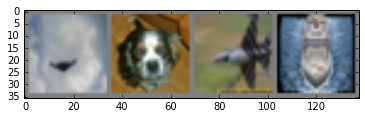

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [18]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.062
[1,  4000] loss: 1.063
[1,  6000] loss: 1.068
[1,  8000] loss: 1.063
[1, 10000] loss: 1.061
[1, 12000] loss: 1.069
[2,  2000] loss: 0.983
[2,  4000] loss: 0.994
[2,  6000] loss: 1.021
[2,  8000] loss: 1.014
[2, 10000] loss: 1.000
[2, 12000] loss: 1.030
Finished Training


('GroundTruth: ', '  cat  ship  ship plane')


Exception NameError: "global name 'FileNotFoundError' is not defined" in <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f88608bab90>> ignored


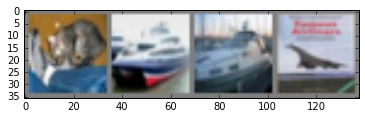

In [19]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [20]:
outputs = net(images)

In [21]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))



('Predicted: ', '  cat  ship  ship plane')


In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 73 %
Accuracy of   car : 81 %
Accuracy of  bird : 38 %
Accuracy of   cat : 34 %
Accuracy of  deer : 43 %
Accuracy of   dog : 32 %
Accuracy of  frog : 83 %
Accuracy of horse : 66 %
Accuracy of  ship : 77 %
Accuracy of truck : 62 %


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)


cpu


In [30]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [19]:
from __future__ import division
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.autograd import Variable
import numpy as np 

def parse_cfg(cfgfile):

    file = open(cfgfile,'r')
    lines = file.read().split('\n')
    lines = [x for x in lines if len(x) > 0]
    lines = [x for x in lines if x[0] != '#']
    lines = [x.rstrip().lstrip() for x in lines]

    block = {}

    blocks = []

    for line in lines:
        if line[0] == "[":
            if len(block) != 0:
                #print("the block :",block)
                blocks.append(block)
                block = {}
            block["type"] = line[1:-1].rstrip()
            #print("TYPE",block["type"])
        else:
            key,value = line.split("=")
            #print(key,value)
            block[key.rstrip()] = value.lstrip()
    blocks.append(block)

    return blocks


In [20]:
blks = parse_cfg('yolov3.cfg')
blks

[{'angle': '0',
  'batch': '1',
  'burn_in': '1000',
  'channels': '3',
  'decay': '0.0005',
  'exposure': '1.5',
  'height': '416',
  'hue': '.1',
  'learning_rate': '0.001',
  'max_batches': '500200',
  'momentum': '0.9',
  'policy': 'steps',
  'saturation': '1.5',
  'scales': '.1,.1',
  'steps': '400000,450000',
  'subdivisions': '1',
  'type': 'net',
  'width': '416'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '32',
  'pad': '1',
  'size': '3',
  'stride': '1',
  'type': 'convolutional'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '64',
  'pad': '1',
  'size': '3',
  'stride': '2',
  'type': 'convolutional'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '32',
  'pad': '1',
  'size': '1',
  'stride': '1',
  'type': 'convolutional'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '64',
  'pad': '1',
  'size': '3',
  'stride': '1',
  'type': 'convolutional'},
 {'activation': 'linear', 'from': '-3', 'type': 

In [17]:
blks[1:]

[{'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '32',
  'pad': '1',
  'size': '3',
  'stride': '1',
  'type': 'convolutional'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '64',
  'pad': '1',
  'size': '3',
  'stride': '2',
  'type': 'convolutional'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '32',
  'pad': '1',
  'size': '1',
  'stride': '1',
  'type': 'convolutional'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '64',
  'pad': '1',
  'size': '3',
  'stride': '1',
  'type': 'convolutional'},
 {'activation': 'linear', 'from': '-3', 'type': 'shortcut'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '128',
  'pad': '1',
  'size': '3',
  'stride': '2',
  'type': 'convolutional'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '64',
  'pad': '1',
  'size': '1',
  'stride': '1',
  'type': 'convolutional'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '128',
  '

In [21]:
class EmptyLayer(nn.Module):
    
    def __init__(self):
        super(EmptyLayer , self).__init__()

In [22]:
class DetectionLayer(nn.Module):
    
    def __init__(self, anchors):
        super(DetectionLayer , self).__init__()
        self.anchors = anchors

In [35]:
def create_modules(blocks):
    net_info = blocks[0]     #Captures the information about the input and pre-processing    
    module_list = nn.ModuleList()
    prev_filters = 3
    output_filters = []
    for index, x in enumerate(blocks[1:]):
        module = nn.Sequential()

        #check the type of block
        #create a new module for the block
        #append to module_list
        if (x["type"] == "convolutional"):
            #Get the info about the layer
            activation = x["activation"]
            try:
                batch_normalize = int(x["batch_normalize"])
                bias = False
            except:
                batch_normalize = 0
                bias = True

            filters= int(x["filters"])
            padding = int(x["pad"])
            kernel_size = int(x["size"])
            stride = int(x["stride"])

            if padding:
                pad = (kernel_size - 1) // 2
            else:
                pad = 0

            #Add the convolutional layer
            conv = nn.Conv2d(prev_filters, filters, kernel_size, stride, pad, bias = bias)
            module.add_module("conv_{0}".format(index), conv)

            #Add the Batch Norm Layer
            if batch_normalize:
                bn = nn.BatchNorm2d(filters)
                module.add_module("batch_norm_{0}".format(index), bn)

            #Check the activation. 
            #It is either Linear or a Leaky ReLU for YOLO
            if activation == "leaky":
                activn = nn.LeakyReLU(0.1, inplace = True)
                module.add_module("leaky_{0}".format(index), activn)

        #If it's an upsampling layer
        #We use Bilinear2dUpsampling
        elif (x["type"] == "upsample"):
            stride = int(x["stride"])
            upsample = nn.Upsample(scale_factor = 2, mode = "bilinear")
            module.add_module("upsample_{}".format(index), upsample)
             #If it is a route layer
        elif (x["type"] == "route"):
            x["layers"] = x["layers"].split(',')
            #Start  of a route
            start = int(x["layers"][0])
            #end, if there exists one.
            try:
                end = int(x["layers"][1])
            except:
                end = 0
            #Positive anotation
            if start > 0: 
                start = start - index
            if end > 0:
                end = end - index
            route = EmptyLayer()
            module.add_module("route_{0}".format(index), route)
            if end < 0:
                filters = output_filters[index + start] + output_filters[index + end]
            else:
                filters= output_filters[index + start]

        #shortcut corresponds to skip connection
        elif x["type"] == "shortcut":
            shortcut = EmptyLayer()
            module.add_module("shortcut_{}".format(index), shortcut)
              #Yolo is the detection layer
        elif x["type"] == "yolo":
            mask = x["mask"].split(",")
            mask = [int(j) for j in mask]
            print(x["anchors"])
            anchors = x["anchors"].split(",")
            anchors = [int(a) for a in anchors]
            anchors = [(anchors[i], anchors[i+1]) for i in range(0, len(anchors),2)]
            anchors = [anchors[i] for i in mask]

            detection = DetectionLayer(anchors)
            module.add_module("Detection_{}".format(index), detection)
        module_list.append(module)
        prev_filters = filters
        output_filters.append(filters)
    return (net_info, module_list) 



In [36]:
blocks = parse_cfg("yolov3.cfg")

In [37]:
print(create_modules(blocks))

10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326
10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326
10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326
({'hue': '.1', 'saturation': '1.5', 'angle': '0', 'decay': '0.0005', 'learning_rate': '0.001', 'scales': '.1,.1', 'batch': '1', 'height': '416', 'channels': '3', 'width': '416', 'subdivisions': '1', 'burn_in': '1000', 'policy': 'steps', 'max_batches': '500200', 'steps': '400000,450000', 'type': 'net', 'momentum': '0.9', 'exposure': '1.5'}, ModuleList(
  (0): Sequential(
    (conv_0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (leaky_0): LeakyReLU(negative_slope=0.1, inplace)
  )
  (1): Sequential(
    (conv_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (batch_norm_1): BatchNorm2d(64, eps